In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [63]:
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]    
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

# S3_Fig

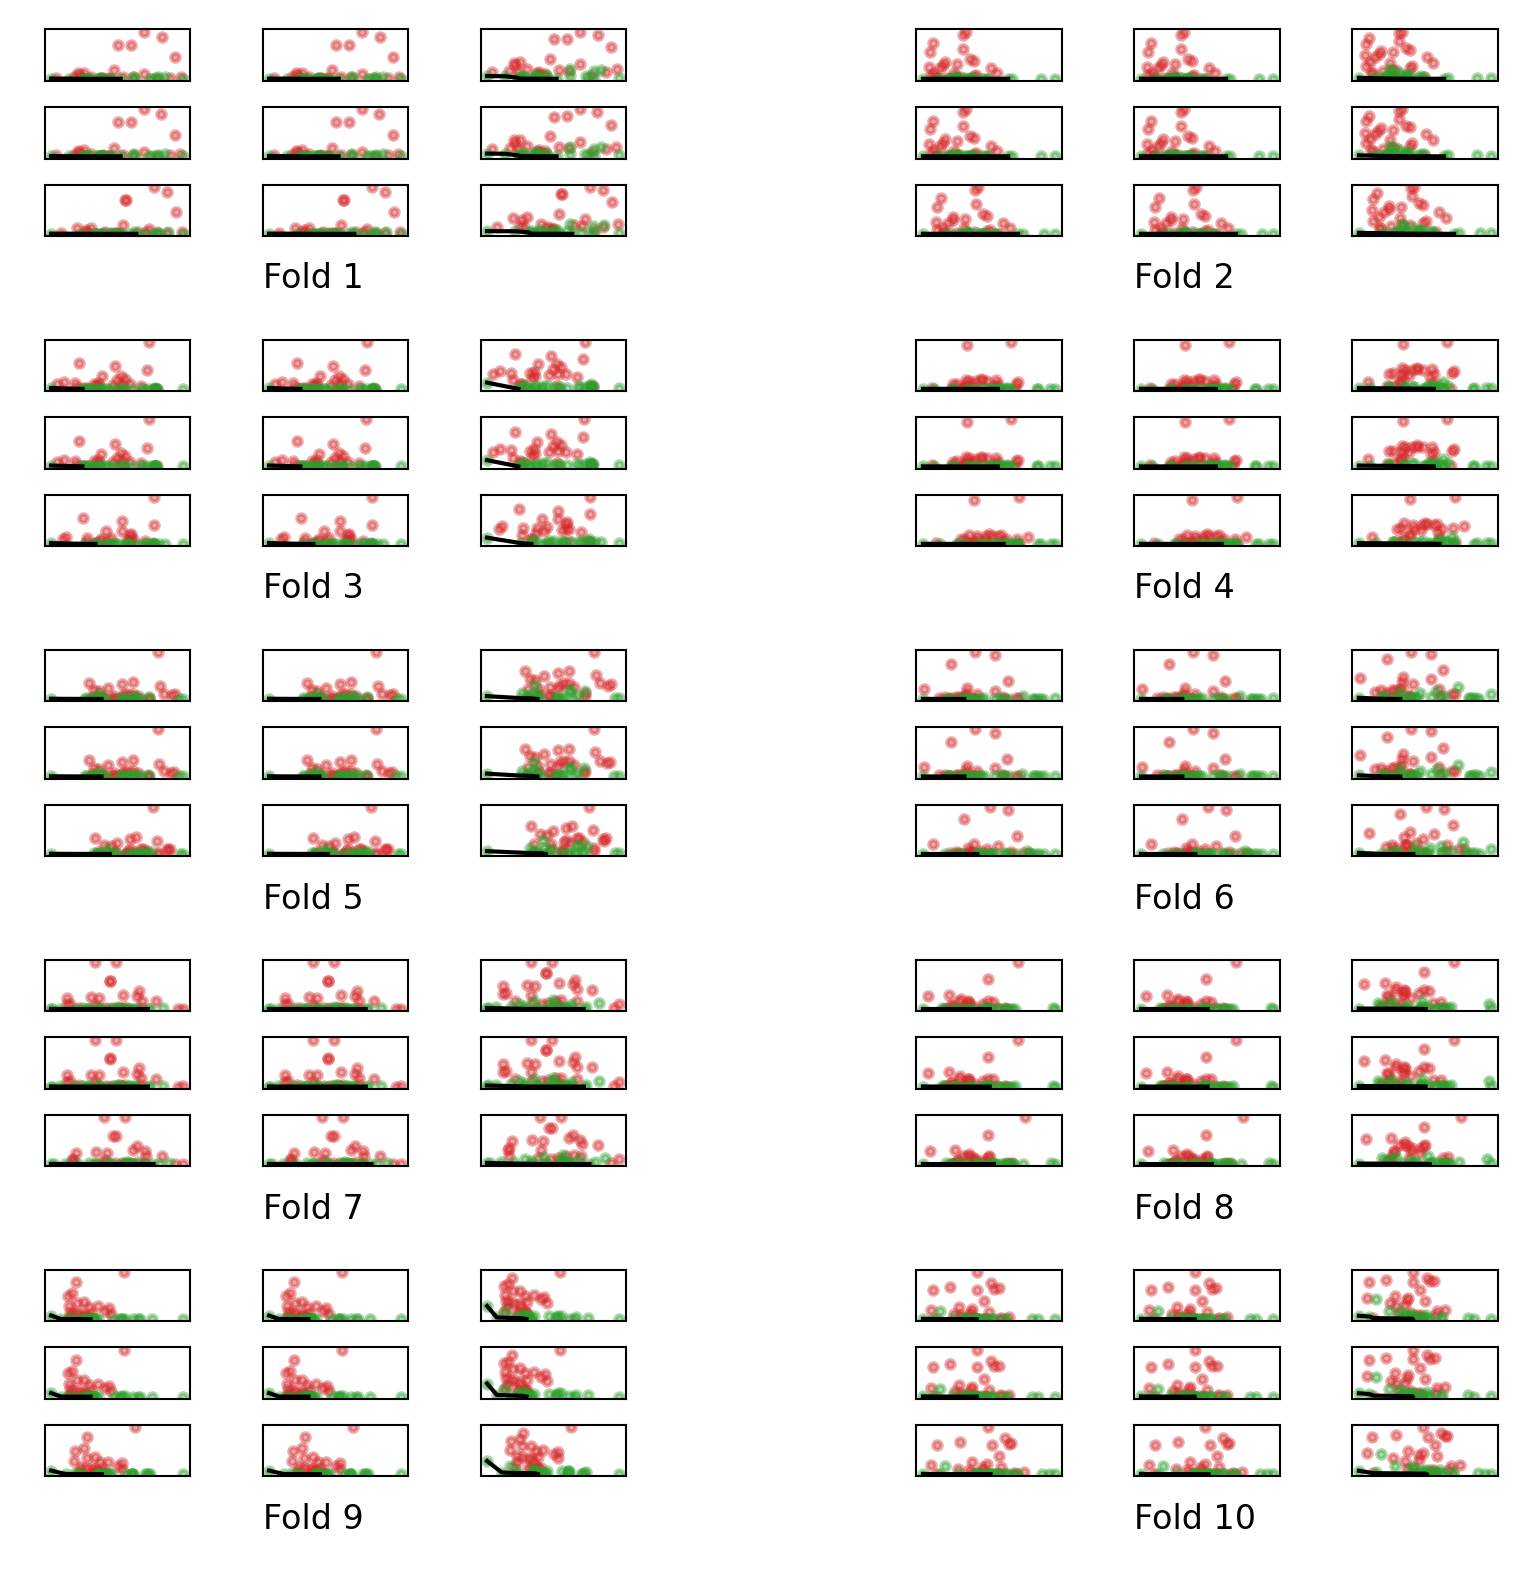

In [66]:
num_trials=10
file_name='ParetoOptimal_R_long'
legend_ind=False
image_type='.tiff'

alpha=0.4
size=4
rowspan=1
colspan=1
fig = plt.figure(figsize=(7.5/1.2,8.75/1.3), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=8) 
for num_trial in range(1,num_trials+1):
    i,j=divmod(num_trial-1,2)
    # load data -------------------------------------------------------
    PO=pd.read_csv('data/'+file_name+str(num_trial)+'.csv', header=0)

    x2=PO["Intra_Fair2"]
    x3=PO["Intra_Fair3"]
    x4=PO["Intra_Fair4"]

    y1=PO["Inter_Fair1"]
    y2=PO["Inter_Fair2"]
    y3=PO["Inter_Fair3"]

    KDD=PO[PO["lam2"]==0]
    FAIR=PO[PO["lam2"]!=0]

    x2_kdd=KDD["Intra_Fair2"]
    x3_kdd=KDD["Intra_Fair3"]
    x4_kdd=KDD["Intra_Fair4"]

    y1_kdd=KDD["Inter_Fair1"]
    y2_kdd=KDD["Inter_Fair2"]
    y3_kdd=KDD["Inter_Fair3"]

    x2_fair=FAIR["Intra_Fair2"]
    x3_fair=FAIR["Intra_Fair3"]
    x4_fair=FAIR["Intra_Fair4"]

    y1_fair=FAIR["Inter_Fair1"]
    y2_fair=FAIR["Inter_Fair2"]
    y3_fair=FAIR["Inter_Fair3"]

    # x2 | y1
    #plt.subplot(331)
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y1,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x2_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    #plt.xlabel('Intra 2')
    #plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])

    # x2 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y2,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x2_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y2_pareto, color='black',linestyle='-',linewidth=1)
    #plt.xlabel('Intra 2')
    #plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x2 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y3,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x2_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y3_pareto, color='black',linestyle='-',linewidth=1)
    #plt.xlabel('Intra 2')
    #plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])

    # x3 | y1
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y1,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x3_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    #plt.xlabel('Intra 3')
    #plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])


    # x3 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y2,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x3_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y2_pareto, color='black',linestyle='-',linewidth=1)
    #plt.xlabel('Intra 3')
    #plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x3 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y3,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x3_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) 
    #plt.xlabel('Intra 3')
    #plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])

    # x4 | y1
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y1,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x4_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #plt.xlabel('Intra 4')
    #plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])

    # x4 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y2,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x4_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #plt.xlabel('Intra 4')
    #plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x4 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y3,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x4_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #plt.xlabel('Intra 4')
    #plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])
    
    ax=plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (3+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    ax.text(0, 0.5,'Fold '+str(num_trial),fontsize=8)
    plt.axis('off')

# Save Images --------------------------------------------------------------------------
#plt.suptitle('Trial '+str(num_trial))
if legend_ind:
    fig.legend(['Pareto front', 'Sühr et al. 2019 (L)', 'Intra 5 + Inter 3 (L)'],bbox_to_anchor=(0.5, 0., 0.8, 0.5),borderaxespad=0,frameon=False) #bbox_to_anchor=(0.5, 0., 0.8, 0.5)
#plt.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.savefig('plots/S3_Fig'+image_type,bbox_inches = 'tight',dpi=300)

# S1_Fig

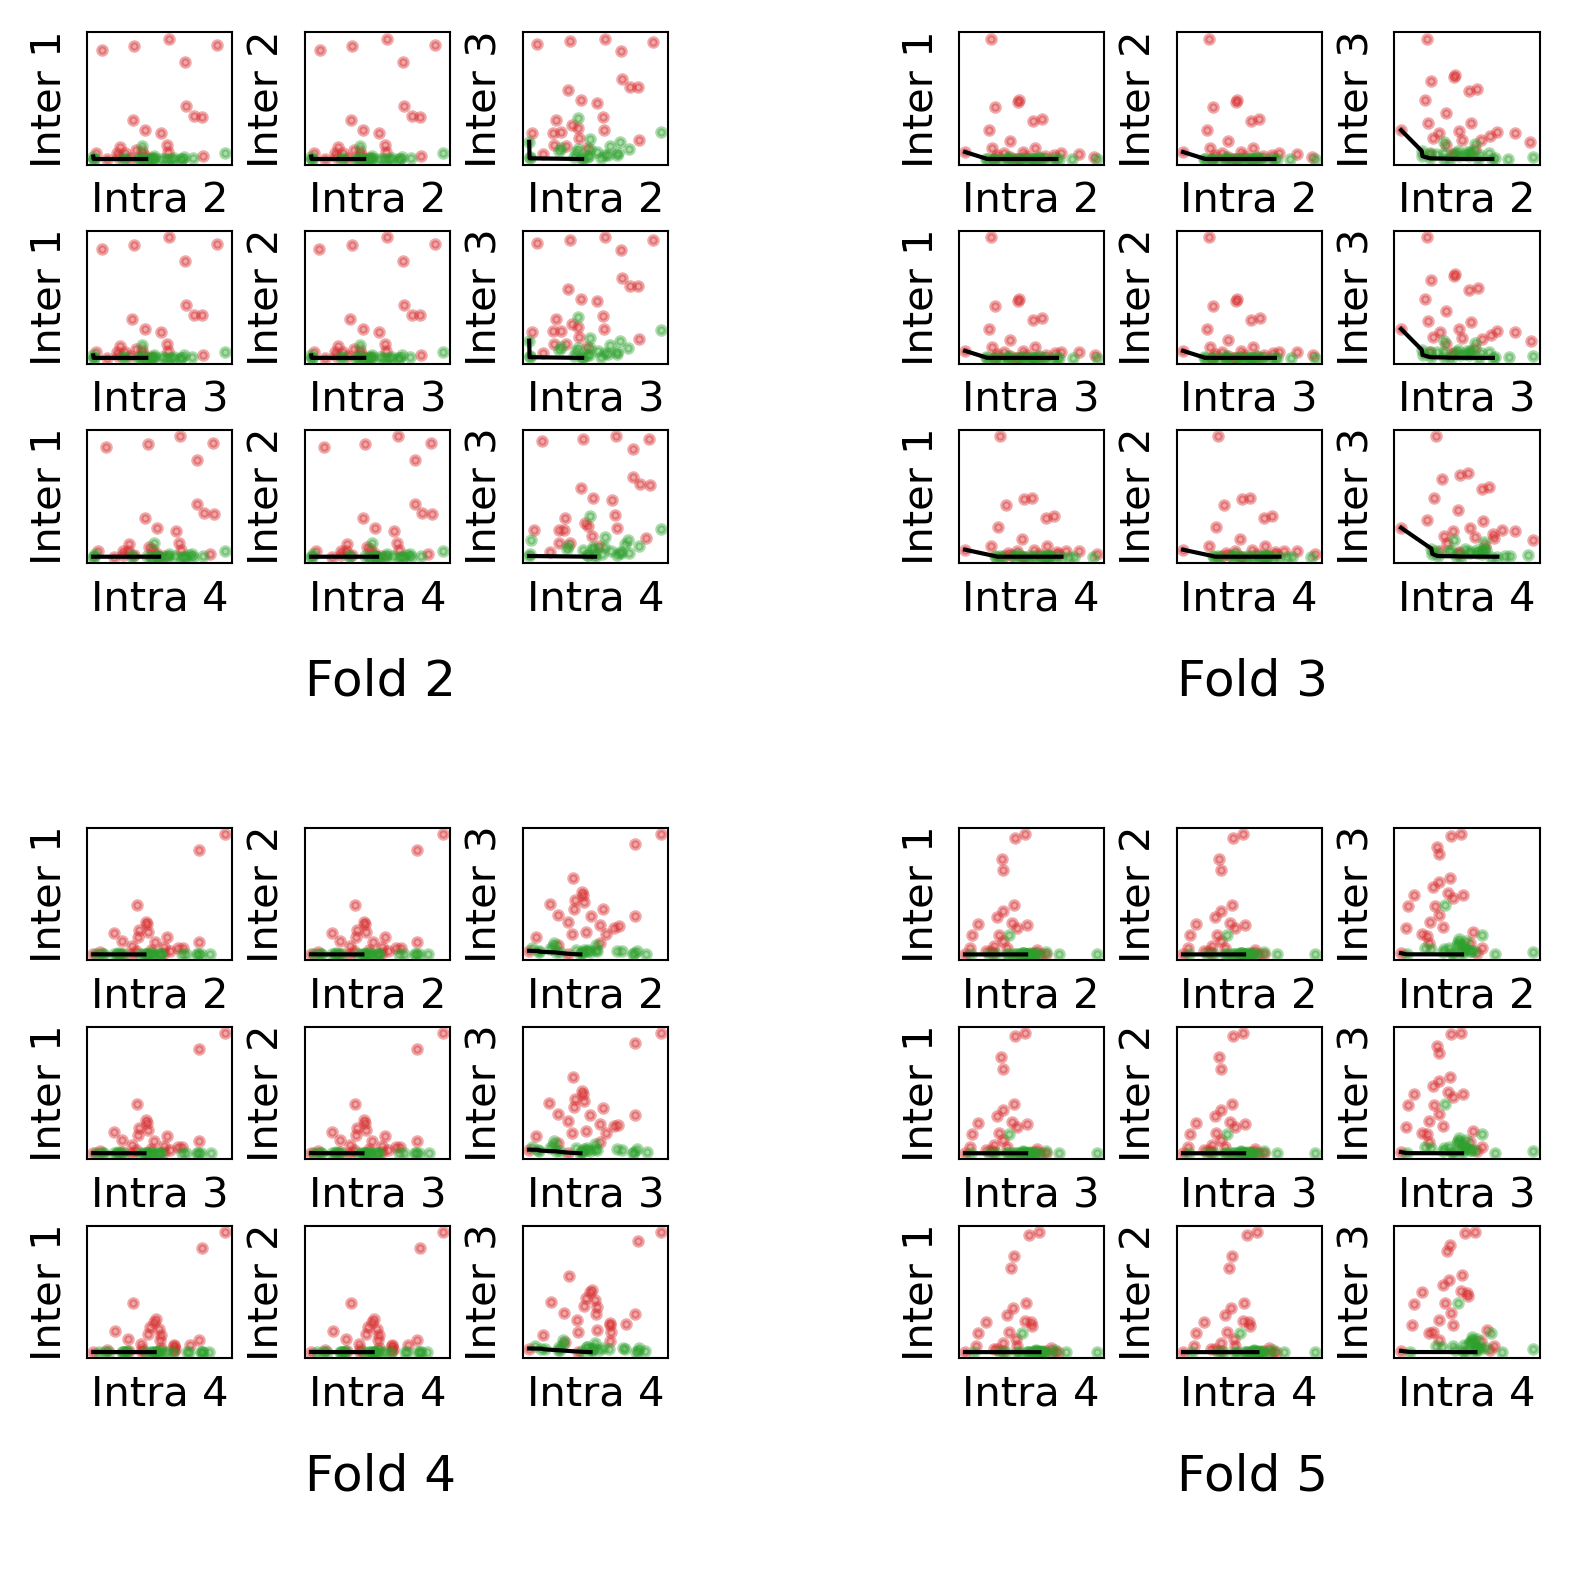

In [65]:
num_trials=4
file_name='ParetoOptimal_R_'
legend_ind=False
image_type='.tiff'

alpha=0.4
size=4
rowspan=1
colspan=1
fig = plt.figure(figsize=(7.5/1.2,8.75/1.3), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=10) 
for num_trial in range(1,num_trials+1):
    i,j=divmod(num_trial-1,2)
    # load data -------------------------------------------------------
    PO=pd.read_csv('data/'+file_name+str(num_trial+1)+'.csv', header=0)

    x2=PO["Intra_Fair2"]
    x3=PO["Intra_Fair3"]
    x4=PO["Intra_Fair4"]

    y1=PO["Inter_Fair1"]
    y2=PO["Inter_Fair2"]
    y3=PO["Inter_Fair3"]

    KDD=PO[PO["lam2"]==0]
    FAIR=PO[PO["lam2"]!=0]

    x2_kdd=KDD["Intra_Fair2"]
    x3_kdd=KDD["Intra_Fair3"]
    x4_kdd=KDD["Intra_Fair4"]

    y1_kdd=KDD["Inter_Fair1"]
    y2_kdd=KDD["Inter_Fair2"]
    y3_kdd=KDD["Inter_Fair3"]

    x2_fair=FAIR["Intra_Fair2"]
    x3_fair=FAIR["Intra_Fair3"]
    x4_fair=FAIR["Intra_Fair4"]

    y1_fair=FAIR["Inter_Fair1"]
    y2_fair=FAIR["Inter_Fair2"]
    y3_fair=FAIR["Inter_Fair3"]

    # x2 | y1
    #plt.subplot(331)
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y1,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x2_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    plt.xlabel('Intra 2')
    plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])

    # x2 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y2,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x2_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y2_pareto, color='black',linestyle='-',linewidth=1)
    plt.xlabel('Intra 2')
    plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x2 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (0+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x2,y3,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x2_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y3_pareto, color='black',linestyle='-',linewidth=1)
    plt.xlabel('Intra 2')
    plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])

    # x3 | y1
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y1,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x3_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    plt.xlabel('Intra 3')
    plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])


    # x3 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y2,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x3_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y2_pareto, color='black',linestyle='-',linewidth=1)
    plt.xlabel('Intra 3')
    plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x3 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (1+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x3,y3,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x3_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) 
    plt.xlabel('Intra 3')
    plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])

    # x4 | y1
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,0+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y1,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y1_pareto = PF[1]
    plt.scatter(x4_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    plt.xlabel('Intra 4')
    plt.ylabel('Inter 1')
    plt.xticks([])
    plt.yticks([])

    # x4 | y2
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y2,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y2_pareto = PF[1]
    plt.scatter(x4_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    plt.xlabel('Intra 4')
    plt.ylabel('Inter 2')
    plt.xticks([])
    plt.yticks([])

    # x4 | y3
    ax = plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (2+4*i*rowspan,2+4*j*colspan), rowspan=rowspan, colspan=colspan)
    PF=pareto_frontier(x4,y3,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y3_pareto = PF[1]
    plt.scatter(x4_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    plt.xlabel('Intra 4')
    plt.ylabel('Inter 3')
    plt.xticks([])
    plt.yticks([])
    
    ax=plt.subplot2grid((int(num_trials/2)*4*rowspan, 2*4*colspan-1), (3+4*i*rowspan,1+4*j*colspan), rowspan=rowspan, colspan=colspan)
    ax.text(0, 0.5,'Fold '+str(num_trial+1),fontsize=12)
    plt.axis('off')

# Save Images --------------------------------------------------------------------------
#plt.suptitle('Trial '+str(num_trial))
if legend_ind:
    fig.legend(['Pareto front', 'Sühr et al. 2019 (L)', 'Intra 5 + Inter 3 (L)'],bbox_to_anchor=(0.5, 0., 0.8, 0.5),borderaxespad=0,frameon=False) #bbox_to_anchor=(0.5, 0., 0.8, 0.5)
#plt.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.savefig('plots/S1_Fig'+image_type,bbox_inches = 'tight',dpi=300)

# Fig2

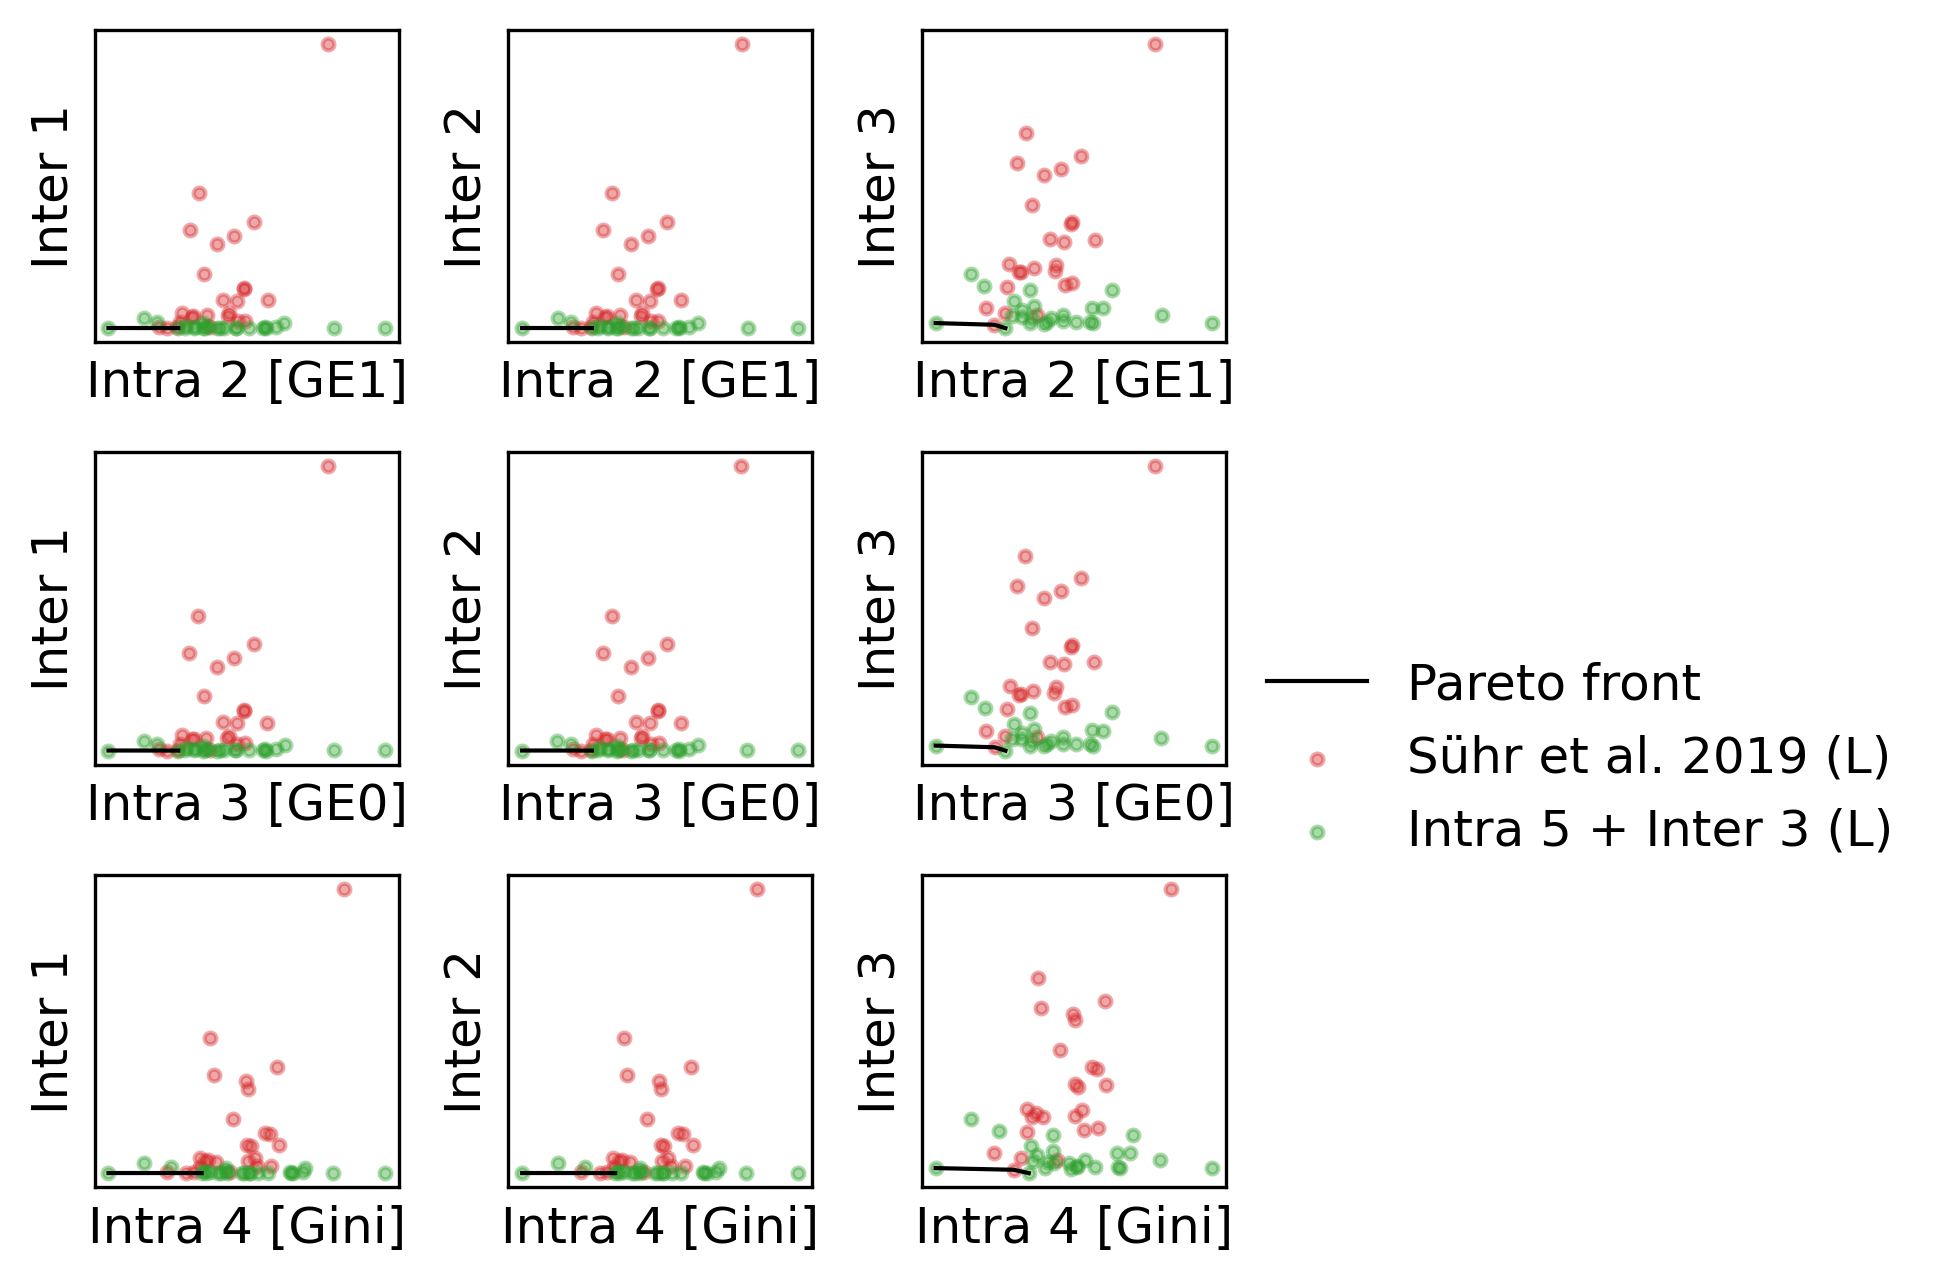

In [13]:
plot_trials('ParetoOptimal_R_',1,True,'.tiff')

In [12]:
def plot_trials(file_name,num_trial,legend_ind,image_type):
    
    fig, axes = plt.subplots(3, 3,figsize=(7.5/1.75,8.75/2), dpi=300)
    plt.rc('axes', labelsize=12)
    plt.rc('legend',fontsize=12)
    # load data -------------------------------------------------------
    PO=pd.read_csv('data/'+file_name+str(num_trial)+'.csv', header=0)

    x2=PO["Intra_Fair2"]
    x3=PO["Intra_Fair3"]
    x4=PO["Intra_Fair4"]

    y1=PO["Inter_Fair1"]
    y2=PO["Inter_Fair2"]
    y3=PO["Inter_Fair3"]

    KDD=PO[PO["lam2"]==0]
    FAIR=PO[PO["lam2"]!=0]

    x2_kdd=KDD["Intra_Fair2"]
    x3_kdd=KDD["Intra_Fair3"]
    x4_kdd=KDD["Intra_Fair4"]

    y1_kdd=KDD["Inter_Fair1"]
    y2_kdd=KDD["Inter_Fair2"]
    y3_kdd=KDD["Inter_Fair3"]

    x2_fair=FAIR["Intra_Fair2"]
    x3_fair=FAIR["Intra_Fair3"]
    x4_fair=FAIR["Intra_Fair4"]

    y1_fair=FAIR["Inter_Fair1"]
    y2_fair=FAIR["Inter_Fair2"]
    y3_fair=FAIR["Inter_Fair3"]

    # Plot ------------------------------------------------------------
    alpha=0.4
    size=8

    # x2 | y1
    #plt.subplot(331)

    PF=pareto_frontier(x2,y1,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y1_pareto = PF[1]

    axes[0,0].scatter(x2_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0,0].scatter(x2_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0,0].plot(x2_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[0,0].set_xlabel('Intra 2 [GE1]')
    axes[0,0].set_ylabel('Inter 1')
    axes[0,0].set_xticks([])
    axes[0,0].set_yticks([])

    # x2 | y2
    #plt.subplot(332)
    PF=pareto_frontier(x2,y2,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y2_pareto = PF[1]

    axes[0,1].scatter(x2_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0,1].scatter(x2_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0,1].plot(x2_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[0,1].set_xlabel('Intra 2 [GE1]')
    axes[0,1].set_ylabel('Inter 2')
    axes[0,1].set_xticks([])
    axes[0,1].set_yticks([])

    # x2 | y3
    #plt.subplot(333)
    PF=pareto_frontier(x2,y3,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y3_pareto = PF[1]

    axes[0,2].scatter(x2_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0,2].scatter(x2_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0,2].plot(x2_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[0,2].set_xlabel('Intra 2 [GE1]')
    axes[0,2].set_ylabel('Inter 3')
    axes[0,2].set_xticks([])
    axes[0,2].set_yticks([])
    # x3 | y1
    #plt.subplot(334)
    PF=pareto_frontier(x3,y1,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y1_pareto = PF[1]

    axes[1,0].scatter(x3_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1,0].scatter(x3_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1,0].plot(x3_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[1,0].set_xlabel('Intra 3 [GE0]')
    axes[1,0].set_ylabel('Inter 1')
    #plt.xlim((-10**(-14),10**(-13)))
    #plt.ylim((-10**(-14),0.8*10**(-13)))
    axes[1,0].set_xticks([])
    axes[1,0].set_yticks([])

    # x3 | y2
    #plt.subplot(335)
    PF=pareto_frontier(x3,y2,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y2_pareto = PF[1]

    axes[1,1].scatter(x3_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1,1].scatter(x3_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1,1].plot(x3_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[1,1].set_xlabel('Intra 3 [GE0]')
    axes[1,1].set_ylabel('Inter 2')
    axes[1,1].set_xticks([])
    axes[1,1].set_yticks([])

    # x3 | y3
    #plt.subplot(336)
    PF=pareto_frontier(x3,y3,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y3_pareto = PF[1]

    axes[1,2].scatter(x3_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1,2].scatter(x3_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1,2].plot(x3_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[1,2].set_xlabel('Intra 3 [GE0]')
    axes[1,2].set_ylabel('Inter 3')
    axes[1,2].set_xticks([])
    axes[1,2].set_yticks([])

    # x4 | y1
    #plt.subplot(337)
    PF=pareto_frontier(x4,y1,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y1_pareto = PF[1]

    axes[2,0].scatter(x4_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2,0].scatter(x4_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2,0].plot(x4_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[2,0].set_xlabel('Intra 4 [Gini]')
    axes[2,0].set_ylabel('Inter 1')
    axes[2,0].set_xticks([])
    axes[2,0].set_yticks([])

    # x4 | y2
    #plt.subplot(338)
    PF=pareto_frontier(x4,y2,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y2_pareto = PF[1]

    axes[2,1].scatter(x4_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2,1].scatter(x4_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2,1].plot(x4_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[2,1].set_xlabel('Intra 4 [Gini]')
    axes[2,1].set_ylabel('Inter 2')
    axes[2,1].set_xticks([])
    axes[2,1].set_yticks([])
    
    # x4 | y3
    PF=pareto_frontier(x4,y3,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y3_pareto = PF[1]

    axes[2,2].scatter(x4_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2,2].scatter(x4_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2,2].plot(x4_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    axes[2,2].set_xlabel('Intra 4 [Gini]')
    axes[2,2].set_ylabel('Inter 3')
    axes[2,2].set_xticks([])
    axes[2,2].set_yticks([])
    
    # Save Images --------------------------------------------------------------------------
    if legend_ind:
        fig.legend(['Pareto front', 'Sühr et al. 2019 (L)', 'Intra 5 + Inter 3 (L)'],bbox_to_anchor=(0.5, 0.,1, 0.5),borderaxespad=0,frameon=False) #bbox_to_anchor=(0.5, 0., 0.8, 0.5)
    plt.tight_layout()
    plt.savefig('plots/Fig2'+image_type,bbox_inches = 'tight') 

# S2 Fig

In [61]:
def histx(x):
    plt.xlim([x.min()*(1-margin),x.max()*(1+margin)])
    counts, bins = np.histogram(x)
    plt.hist(bins[:-1], bins, weights=counts/sum(counts),color='tab:green')
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0,1])
    plt.axis('off')

def histy(y):
    counts,bins= np.histogram(y)
    plt.hist(bins[:-1], bins,weights=counts/sum(counts),orientation='horizontal',color='tab:green')
    plt.xticks([])
    plt.yticks([])
    plt.ylim([y.min()*(1-margin),y.max()*(1+margin)])
    plt.xlim([0,1])
    plt.axis('off')
    
def scatterxy(x,y):
    plt.scatter(x=x, y=y, s=size, alpha=alpha,c='tab:green')
    plt.xticks([])
    plt.yticks([])
    plt.xlim([x.min()*(1-margin),x.max()*(1+margin)])
    plt.ylim([y.min()*(1-margin),y.max()*(1+margin)])

def textx(i):
    ax.text(0.5,0.5,'Intra '+str(i+2),fontsize=8)
    plt.axis('off')
def texty(j):
    ax.text(0.5,0.5,'Inter '+str(j+1),fontsize=8,rotation=90)
    plt.axis('off')

In [10]:
CROSS=pd.read_csv('data/ParetoOptimal_random_long.csv', header=0)
alpha=0.4
size=4
margin=0.1

fig = plt.figure(figsize=(7.5/1.2,8.75/1.3), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=10) 
figsplit=(3*4,3*4)
for i in range(3):
    for j in range(3):
        x, y = CROSS['Intra_Fair'+str(i+2)],CROSS['Inter_Fair'+str(j+1)]
        ax = plt.subplot2grid(figsplit,(0+4*i,1+4*j),rowspan=1,colspan=2)
        histx(x)
        ax = plt.subplot2grid(figsplit,(1+4*i,1+4*j),rowspan=2,colspan=2)
        scatterxy(x,y)
        ax = plt.subplot2grid(figsplit,(1+4*i,3+4*j),rowspan=2,colspan=1)
        histy(y)
        ax = plt.subplot2grid(figsplit,(3+4*i,1+4*j),rowspan=1,colspan=2)
        textx(i)
        ax = plt.subplot2grid(figsplit,(1+4*i,0+4*j),rowspan=2,colspan=1)
        texty(j)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig('plots/S2_Fig'+image_type,bbox_inches = 'tight',dpi=300)

# F3

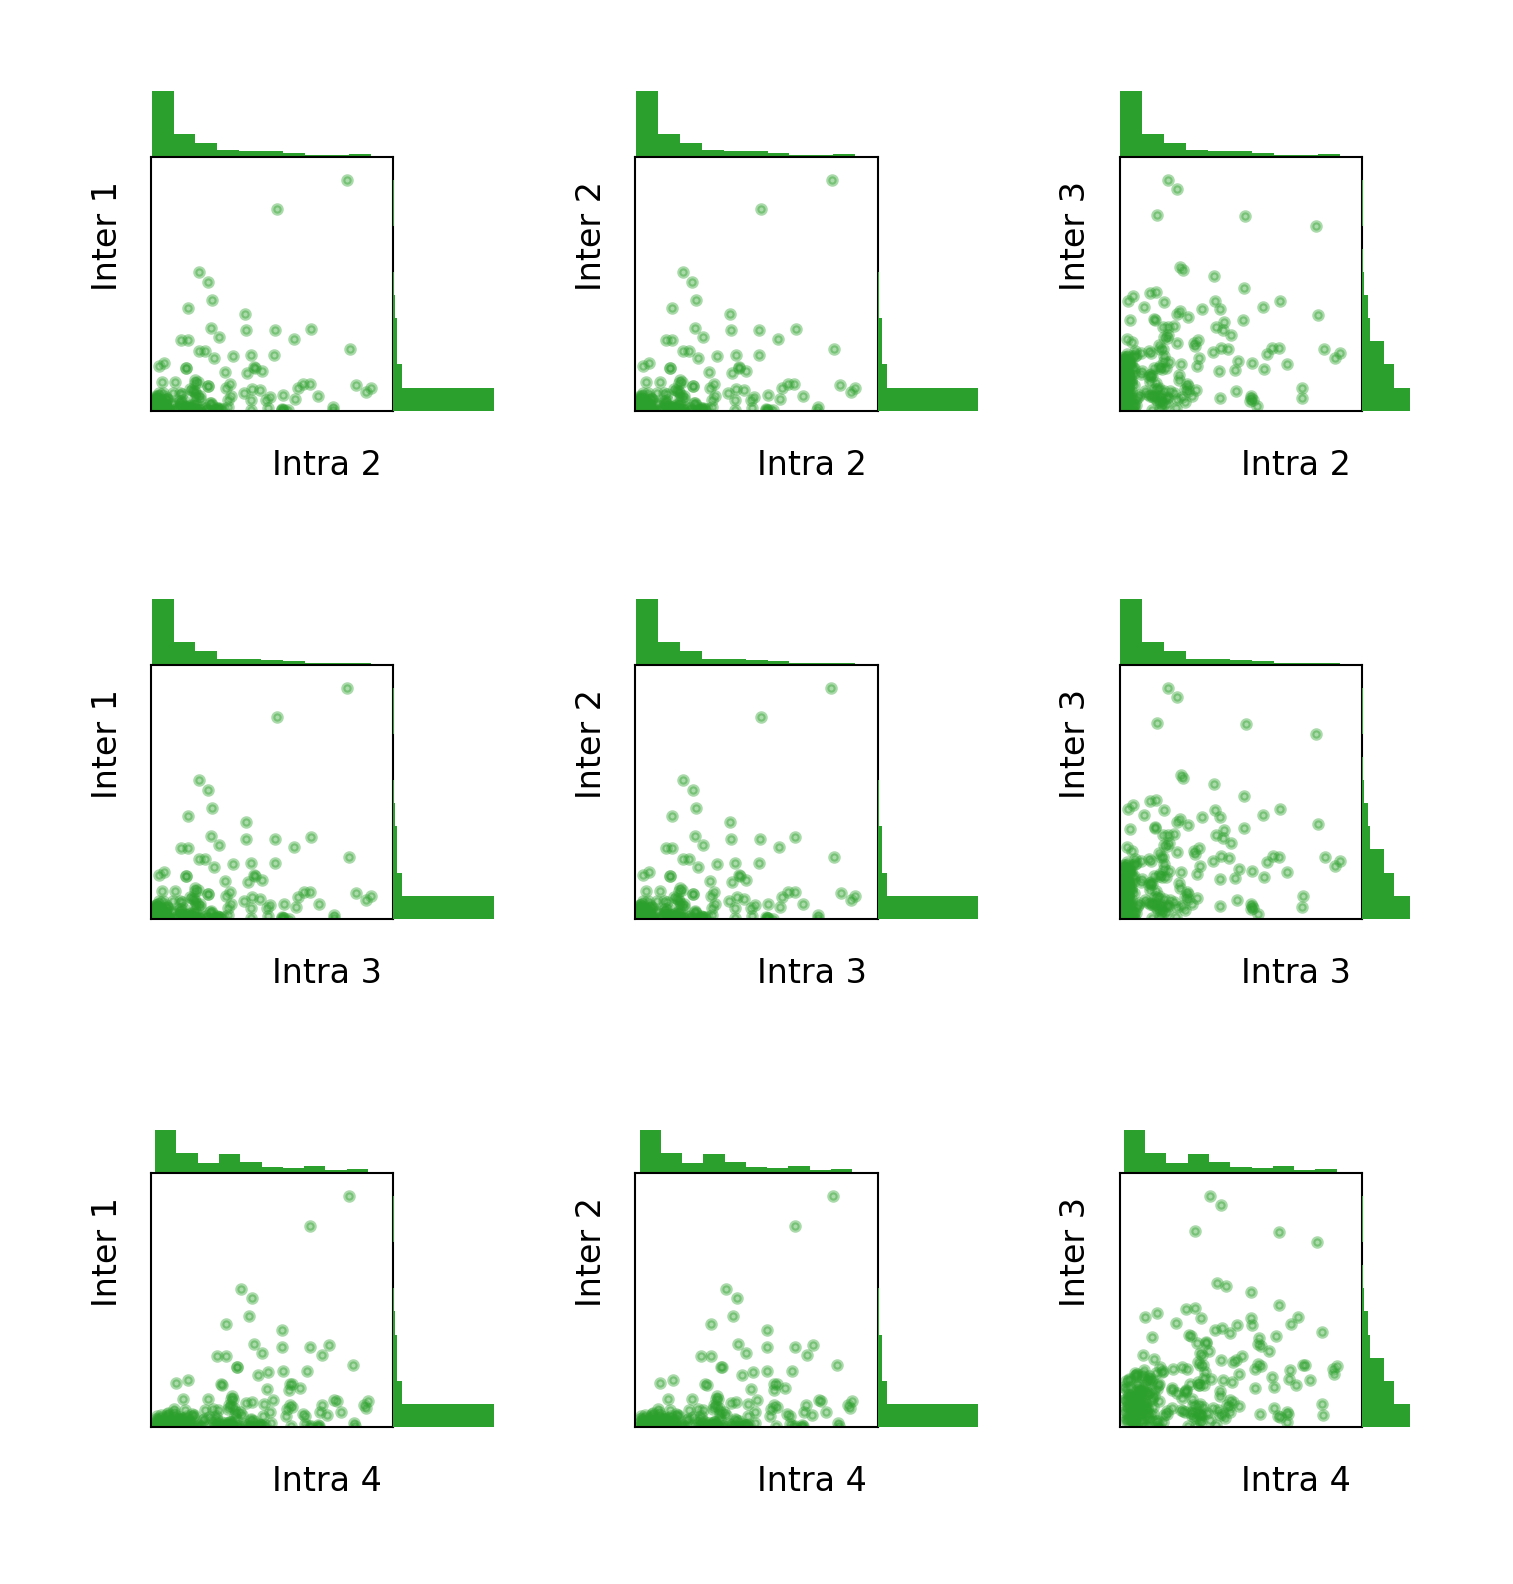

In [62]:
num_trials=10
file_name='ParetoOptimal_R_long'
PO=pd.read_csv('data/'+file_name+str(1)+'.csv', header=0)
for num_trial in range(1,num_trials):
    POtmp=pd.read_csv('data/'+file_name+str(num_trial+1)+'.csv', header=0)
    PO=pd.concat([PO,POtmp],ignore_index=True)

alpha=0.4
size=4
margin=0.1

F3=PO[PO['lam2']==0]
fig = plt.figure(figsize=(7.5/1.2,8.75/1.3), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=10) 
figsplit=(3*4,3*4)
for i in range(3):
    for j in range(3):
        x, y = F3['Intra_Fair'+str(i+2)],F3['Inter_Fair'+str(j+1)]
        ax = plt.subplot2grid(figsplit,(0+4*i,1+4*j),rowspan=1,colspan=2)
        histx(x)
        ax = plt.subplot2grid(figsplit,(1+4*i,1+4*j),rowspan=2,colspan=2)
        scatterxy(x,y)
        ax = plt.subplot2grid(figsplit,(1+4*i,3+4*j),rowspan=2,colspan=1)
        histy(y)
        ax = plt.subplot2grid(figsplit,(3+4*i,1+4*j),rowspan=1,colspan=2)
        textx(i)
        ax = plt.subplot2grid(figsplit,(1+4*i,0+4*j),rowspan=2,colspan=1)
        texty(j)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig('plots/Fig3.tiff',bbox_inches = 'tight',dpi=300)

# Archive

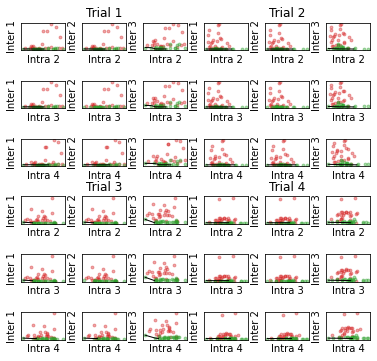

In [62]:
num_trials=4
file_name='ParetoOptimal_R_long'
legend_ind=False
image_type='.tiff'

#plt.figure(dpi=300) 
fig, axes = plt.subplots(6, 6,figsize=(7.5/1.2,8.75/1.5)) #,figsize=(2.63,8.75)

for num_trial in range(1,num_trials+1):
    i,j=divmod(num_trial-1,2)
    # load data -------------------------------------------------------
    PO=pd.read_csv('data/'+file_name+str(num_trial)+'.csv', header=0)

    x2=PO["Intra_Fair2"]
    x3=PO["Intra_Fair3"]
    x4=PO["Intra_Fair4"]

    y1=PO["Inter_Fair1"]
    y2=PO["Inter_Fair2"]
    y3=PO["Inter_Fair3"]

    KDD=PO[PO["lam2"]==0]
    FAIR=PO[PO["lam2"]!=0]

    x2_kdd=KDD["Intra_Fair2"]
    x3_kdd=KDD["Intra_Fair3"]
    x4_kdd=KDD["Intra_Fair4"]

    y1_kdd=KDD["Inter_Fair1"]
    y2_kdd=KDD["Inter_Fair2"]
    y3_kdd=KDD["Inter_Fair3"]

    x2_fair=FAIR["Intra_Fair2"]
    x3_fair=FAIR["Intra_Fair3"]
    x4_fair=FAIR["Intra_Fair4"]

    y1_fair=FAIR["Inter_Fair1"]
    y2_fair=FAIR["Inter_Fair2"]
    y3_fair=FAIR["Inter_Fair3"]

    # Plot ------------------------------------------------------------
    alpha=0.4
    size=8

    #, figsize=(9,8)
    # x2 | y1
    #plt.subplot(331)

    PF=pareto_frontier(x2,y1,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y1_pareto = PF[1]

    axes[0+3*i,0+3*j].scatter(x2_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0+3*i,0+3*j].scatter(x2_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0+3*i,0+3*j].plot(x2_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    axes[0+3*i,0+3*j].set_xlabel('Intra 2')
    axes[0+3*i,0+3*j].set_ylabel('Inter 1')
    axes[0+3*i,0+3*j].set_xticks([])
    axes[0+3*i,0+3*j].set_yticks([])

    # x2 | y2
    #plt.subplot(332)
    PF=pareto_frontier(x2,y2,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y2_pareto = PF[1]

    axes[0+3*i,1+3*j].scatter(x2_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0+3*i,1+3*j].scatter(x2_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0+3*i,1+3*j].plot(x2_pareto, y2_pareto, color='black',linestyle='-',linewidth=1)
    axes[0+3*i,1+3*j].set_xlabel('Intra 2')
    axes[0+3*i,1+3*j].set_ylabel('Inter 2')
    axes[0+3*i,1+3*j].set_xticks([])
    axes[0+3*i,1+3*j].set_yticks([])
    axes[0+3*i,1+3*j].set_title('Trial '+str(num_trial),fontsize=12)

    # x2 | y3
    #plt.subplot(333)
    PF=pareto_frontier(x2,y3,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y3_pareto = PF[1]

    axes[0+3*i,2+3*j].scatter(x2_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[0+3*i,2+3*j].scatter(x2_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[0+3*i,2+3*j].plot(x2_pareto, y3_pareto, color='black',linestyle='-',linewidth=1)
    axes[0+3*i,2+3*j].set_xlabel('Intra 2')
    axes[0+3*i,2+3*j].set_ylabel('Inter 3')
    axes[0+3*i,2+3*j].set_xticks([])
    axes[0+3*i,2+3*j].set_yticks([])

    # x3 | y1
    #plt.subplot(334)
    PF=pareto_frontier(x3,y1,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y1_pareto = PF[1]

    axes[1+3*i,0+3*j].scatter(x3_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1+3*i,0+3*j].scatter(x3_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1+3*i,0+3*j].plot(x3_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) 
    axes[1+3*i,0+3*j].set_xlabel('Intra 3')
    axes[1+3*i,0+3*j].set_ylabel('Inter 1')
    axes[1+3*i,0+3*j].set_xticks([])
    axes[1+3*i,0+3*j].set_yticks([])


    # x3 | y2
    #plt.subplot(335)
    PF=pareto_frontier(x3,y2,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y2_pareto = PF[1]

    axes[1+3*i,1+3*j].scatter(x3_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1+3*i,1+3*j].scatter(x3_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1+3*i,1+3*j].set_xlabel('Intra 3')
    axes[1+3*i,1+3*j].set_ylabel('Inter 2')
    axes[1+3*i,1+3*j].set_xticks([])
    axes[1+3*i,1+3*j].set_yticks([])

    # x3 | y3
    #plt.subplot(336)
    PF=pareto_frontier(x3,y3,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y3_pareto = PF[1]

    axes[1+3*i,2+3*j].scatter(x3_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[1+3*i,2+3*j].scatter(x3_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[1+3*i,2+3*j].plot(x3_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) 
    axes[1+3*i,2+3*j].set_xlabel('Intra 3')
    axes[1+3*i,2+3*j].set_ylabel('Inter 3')
    axes[1+3*i,2+3*j].set_xticks([])
    axes[1+3*i,2+3*j].set_yticks([])

    # x4 | y1
    #plt.subplot(337)
    PF=pareto_frontier(x4,y1,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y1_pareto = PF[1]

    axes[2+3*i,0+3*j].scatter(x4_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2+3*i,0+3*j].scatter(x4_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2+3*i,0+3*j].plot(x4_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    axes[2+3*i,0+3*j].set_xlabel('Intra 4')
    axes[2+3*i,0+3*j].set_ylabel('Inter 1')
    axes[2+3*i,0+3*j].set_xticks([])
    axes[2+3*i,0+3*j].set_yticks([])

    # x4 | y2
    #plt.subplot(338)
    PF=pareto_frontier(x4,y2,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y2_pareto = PF[1]

    axes[2+3*i,1+3*j].scatter(x4_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2+3*i,1+3*j].scatter(x4_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2+3*i,1+3*j].plot(x4_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    axes[2+3*i,1+3*j].set_xlabel('Intra 4')
    axes[2+3*i,1+3*j].set_ylabel('Inter 2')
    axes[2+3*i,1+3*j].set_xticks([])
    axes[2+3*i,1+3*j].set_yticks([])

    # x4 | y3
    #plt.subplot(339)
    PF=pareto_frontier(x4,y3,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y3_pareto = PF[1]

    axes[2+3*i,2+3*j].scatter(x4_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    axes[2+3*i,2+3*j].scatter(x4_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    axes[2+3*i,2+3*j].plot(x4_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    axes[2+3*i,2+3*j].set_xlabel('Intra 4')
    axes[2+3*i,2+3*j].set_ylabel('Inter 3')
    axes[2+3*i,2+3*j].set_xticks([])
    axes[2+3*i,2+3*j].set_yticks([])

# Save Images --------------------------------------------------------------------------
#plt.suptitle('Trial '+str(num_trial))
if legend_ind:
    fig.legend(['Pareto front', 'Sühr et al. 2019 (L)', 'Intra 5 + Inter 3 (L)'],bbox_to_anchor=(0.5, 0., 0.8, 0.5),borderaxespad=0,frameon=False) #bbox_to_anchor=(0.5, 0., 0.8, 0.5)
#plt.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.1)
#plt.gcf().set_size_inches(2.63,8.75)
#plt.savefig('S1_Fig'+image_type,bbox_inches = 'tight',dpi=300)

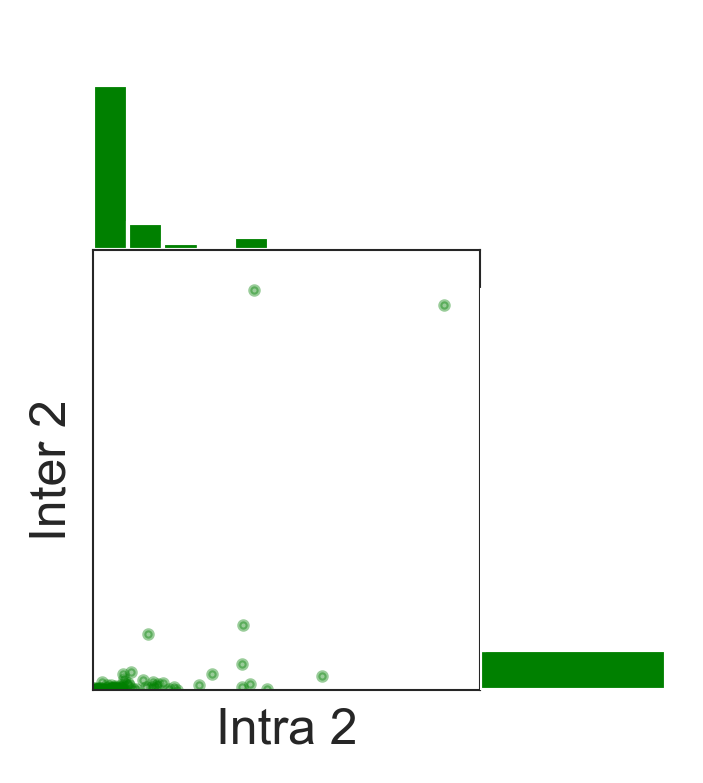

In [351]:
fig = plt.figure(figsize=(7.5/1.,8.75/1.), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=12)
figsplit=(3*3,3*3)
i=0
j=1
x, y = CROSS['Intra_Fair'+str(i+2)],CROSS['Inter_Fair'+str(j+1)]
ax = plt.subplot2grid(figsplit,(0+3*i,0+3*j),rowspan=1,colspan=2)
histx(x)
ax = plt.subplot2grid(figsplit,(1+3*i,0+3*j),rowspan=2,colspan=2)
scatterxy(x,y)
plt.xlabel('Intra '+str(i+2))
plt.ylabel('Inter '+str(j+1))
ax = plt.subplot2grid(figsplit,(1+3*i,2+3*j),rowspan=2,colspan=1)
histy(y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
#plt.savefig('plots/Fig3'+image_type,bbox_inches = 'tight',dpi=300)